In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [24]:
questions = pd.read_csv('ChildlessnessQuestions.csv')
questions.head(8)

,Question Code,Full Question,Construct Name
0,Q1,Women choose not to have a child because they ...,Financial
1,Q2,Women choose not to have a child because it is...,Financial
2,Q3,Women who choose not to have a child due to fi...,Financial
3,Q4,Women in high income jobs choose not to have a...,Financial
4,Q5,"Childless women, who are infertile, choose not...",Financial
5,Q6,Single women choose not to have a child becaus...,Financial
6,Q8,It is perfectly reasonable for a woman to choo...,Choice
7,Q9,"If a woman chooses not to have a child, societ...",Choice


In [3]:
question_score = pd.read_csv('ChildlessnessNJ.csv')
question_score.head()

,Gender,Age,Employment Status,Race/Ethnicity,Relationship Status,Currently have children,Q1,Q2,Q3,Q4,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,Female,19,Student,African American,"Single, but not in a relationship",No,5,2,5.0,5,...,3.0,5.0,2.0,5.0,2.0,2.0,3.0,1.0,4.0,3.0
1,Female,27,Currently unemployed,African American,"Single, but not in a relationship",No,4,4,5.0,5,...,3.0,4.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
2,Female,27,Employee,Haitian-American,"Single, but not in a relationship",No,1,1,4.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
3,Female,45,Employee,Haitian-American,Married,Yes,2,2,4.0,4,...,1.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0
4,Female,31,Employee,African American,Married,Yes,3,3,5.0,3,...,2.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
question_score['Relationship Status'].value_counts()

Relationship Status
Married                              49
Single, but not in a relationship    48
Single, but in a relationship        19
Divorced                              8
Name: count, dtype: int64

In [41]:
question_score['Employment Status'].value_counts()

Employment Status
Employee                64
Student                 45
Self-employed           11
Currently unemployed     4
Name: count, dtype: int64

In [48]:
question_score.value_counts('Currently have children').rename_axis('unique_values')

unique_values
No     74
Yes    50
Name: count, dtype: int64

In [52]:
have_children = question_score.value_counts('Currently have children').rename_axis('unique_values').reset_index(name='counts')
have_children.head()


,unique_values,counts
0,No,74
1,Yes,50


In [54]:
fig = px.pie(have_children, values='counts', names='unique_values')
fig.show()


In [106]:
employment_status = question_score.value_counts('Employment Status', normalize=True).rename_axis('unique_values').reset_index(name='counts')
employment_status.counts.round(decimals=2)

0    0.52
1    0.36
2    0.09
3    0.03
Name: counts, dtype: float64

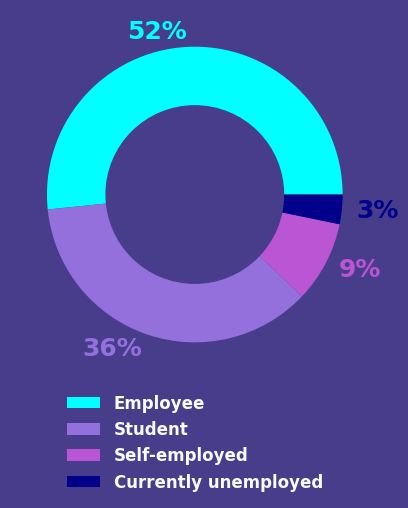

In [131]:
import matplotlib.pyplot as plt

colorscale = ['#00FFFF', '#9370DB', '#BA55D3', '#00008B'] 

# create data
size_of_groups = [64, 45, 11, 4]
group_names = ['Employee', 'Student', 'Self-employed', 'Currently unemployed']
percentages = ['52%', '36%', '9%', '3%']

# Create a pie plot
patches, texts = plt.pie(size_of_groups, labels=percentages, colors=colorscale, textprops={'fontsize': 18, 'weight': 'bold'})


# Set the color for each label
for text, color in zip(texts, colorscale):
    text.set_color(color)

# Add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.6, color='#483D8B')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.gcf().set_facecolor('#483D8B')

legend = plt.legend(group_names, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12, frameon=False)
plt.setp(legend.get_texts(), color='#FAFAFA', weight='bold')
plt.show()
